# Practice notebook for univariate analysis using NHANES data

This notebook will give you the opportunity to perform some univariate analyses on your own using the NHANES.  These analyses are similar to what was done in the week 2 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

da = pd.read_csv("data/nhanes_2015_2016.csv")
pd.isnull(da.DMDMARTL).sum()
da.head()

,Unnamed: 0,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,0,83732,1.0,NaN,1.0,1,1,62,3,1.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,1,83733,1.0,NaN,6.0,1,1,53,3,2.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,2,83734,1.0,NaN,NaN,1,1,78,3,1.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,3,83735,2.0,1.0,1.0,2,2,56,3,1.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,4,83736,2.0,1.0,1.0,2,2,42,4,1.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


## Question 1

Relabel the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to have brief but informative character labels.  Then construct a frequency table of these values for all people, then for women only, and for men only.  Then construct these three frequency tables using only people whose age is between 30 and 40.

In [65]:
# insert your code here
da['DMDMARTL'] = da['DMDMARTL'].replace({
    1:'Married',
    2:'Widowed',
    3:'Divorced',
    4:'Separated',
    5:'Never married',
    6:'Living with partner',
    77:'Refused',
    99:"Don't Know"
})
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})
print('All people: \n{}'.format(da.DMDMARTL.value_counts()))
print('\n')
women = da[da['RIAGENDR']==2]
men = da[da['RIAGENDR']==1]
print('Women: \n{}'.format(women.DMDMARTL.value_counts()))
print('\n')
print('Men: \n{}'.format(men.DMDMARTL.value_counts()))
print('\n')
da_30_40 = da[(da.RIDAGEYR>=30) & (da.RIDAGEYR<=40)]
print('30-40 people: \n{}'.format(da_30_40.DMDMARTL.value_counts()))
print('\n')
women_30_40 = da_30_40[da_30_40['RIAGENDR']==2]
men_30_40 = da_30_40[da_30_40['RIAGENDR']==1]
print('30-40 Women: \n{}'.format(women_30_40.DMDMARTL.value_counts()))
print('\n')
print('30-40Men: \n{}'.format(men_30_40.DMDMARTL.value_counts()))

All people: 
Married                2780
Never married          1004
Divorced                579
Living with partner     527
Widowed                 396
Separated               186
Refused                   2
Name: DMDMARTL, dtype: int64


Women: 
Married                1303
Never married           520
Divorced                350
Widowed                 296
Living with partner     262
Separated               118
Refused                   1
Name: DMDMARTL, dtype: int64


Men: 
Married                1477
Never married           484
Living with partner     265
Divorced                229
Widowed                 100
Separated                68
Refused                   1
Name: DMDMARTL, dtype: int64


30-40 people: 
Married                560
Never married          217
Living with partner    143
Divorced                70
Separated               30
Widowed                  5
Refused                  1
Name: DMDMARTL, dtype: int64


30-40 Women: 
Married                285
Never married   

__Q1a.__ Briefly comment on some of the differences that you observe between the distribution of marital status between women and men, for people of all ages.

In [4]:
w_series = women.DMDMARTL.value_counts()
w_series = (w_series/w_series.sum())*100
m_series = men.DMDMARTL.value_counts()
m_series = (m_series/m_series.sum())*100

print('Women: \n{}'.format(w_series))
print('\n')
print('Men: \n{}'.format(m_series))

Women: 
Married                45.719298
Never married          18.245614
Divorced               12.280702
Widowed                10.385965
Living with partner     9.192982
Separated               4.140351
Refused                 0.035088
Name: DMDMARTL, dtype: float64


Men: 
Married                56.288110
Never married          18.445122
Living with partner    10.099085
Divorced                8.727134
Widowed                 3.810976
Separated               2.591463
Refused                 0.038110
Name: DMDMARTL, dtype: float64


Greater proportion of men are married than women.
Greater proportion of women are divorced than men.
Greater proportion of women are widowed than men.
Greater proportion of women are separated than men.

__Q1b.__ Briefly comment on the differences that you observe between the distribution of marital status states for women between the overall population, and for women between the ages of 30 and 40.

In [5]:
w_30_40_series = women_30_40.DMDMARTL.value_counts()
w_30_40_series = (w_30_40_series/w_30_40_series.sum())*100

print('Women: \n{}'.format(w_series))
print('\n')
print('Women 30 - 40: \n{}'.format(w_30_40_series))

Women: 
Married                45.719298
Never married          18.245614
Divorced               12.280702
Widowed                10.385965
Living with partner     9.192982
Separated               4.140351
Refused                 0.035088
Name: DMDMARTL, dtype: float64


Women 30 - 40: 
Married                53.571429
Never married          21.804511
Living with partner    12.218045
Divorced                8.646617
Separated               3.383459
Widowed                 0.375940
Name: DMDMARTL, dtype: float64


Much greater proportion of all-ages women are widowed than those in 30-40.
Much greater proportion of 30 - 40 women are married than those in all-ages women.

__Q1c.__ Repeat part b for the men.

In [6]:
m_30_40_series = men_30_40.DMDMARTL.value_counts()
m_30_40_series = (m_30_40_series/m_30_40_series.sum())*100

print('Men: \n{}'.format(m_series))
print('\n')
print('Men 30 - 40: \n{}'.format(m_30_40_series))

Men: 
Married                56.288110
Never married          18.445122
Living with partner    10.099085
Divorced                8.727134
Widowed                 3.810976
Separated               2.591463
Refused                 0.038110
Name: DMDMARTL, dtype: float64


Men 30 - 40: 
Married                55.668016
Never married          20.445344
Living with partner    15.789474
Divorced                4.858300
Separated               2.429150
Widowed                 0.607287
Refused                 0.202429
Name: DMDMARTL, dtype: float64


Greater proportion of 30-40 men are living with partners.
Lesser proportion of 30-40 men are divorced.
Lesser proportion of 30-40 men are widowed.

## Question 2

Restricting to the female population, stratify the subjects into age bands no wider than ten years, and construct the distribution of marital status within each age band.  Within each age band, present the distribution in terms of proportions that must sum to 1.

In [7]:
women["agegrp"] = pd.cut(women.RIDAGEYR, [18, 20, 30, 40, 50, 60, 70, 80]) # Create age strata based on these cut points
w_marital = women.groupby(["agegrp"])['DMDMARTL']
w_marital = w_marital.value_counts()
w_marital = w_marital.unstack()
w_marital = w_marital.apply(lambda x: x/x.sum(), axis=1)
w_marital

/home/helios/anaconda3/envs/tensorflow_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


DMDMARTL,Divorced,Living with partner,Married,Never married,Refused,Separated,Widowed
agegrp,,,,,,,
"(18, 20]",NaN,0.205128,0.025641,0.769231,NaN,NaN,NaN
"(20, 30]",0.021401,0.206226,0.305447,0.445525,NaN,0.021401,NaN
"(30, 40]",0.090717,0.120253,0.544304,0.204641,NaN,0.035865,0.004219
"(40, 50]",0.137450,0.073705,0.573705,0.125498,NaN,0.065737,0.023904
"(50, 60]",0.176596,0.068085,0.546809,0.089362,0.002128,0.057447,0.059574
"(60, 70]",0.192744,0.043084,0.480726,0.086168,NaN,0.049887,0.147392
"(70, 80]",0.143902,0.007317,0.317073,0.051220,NaN,0.019512,0.460976


__Q2a.__ Comment on the trends that you see in this series of marginal distributions.

18-20: most women are never-married
20-30: almost half the women are either Living with partner or married. Significant never-married.
30-40: more than half the women are married. 
40-50: more than half the women are maried. There are also significant divorced and never married.
50-60: more than half the women are maried. There are also significant divorced.
60-70: Less than half the women are maried. There are also significant divorced and widowed.
70-80: Less than half the women are widowed. There are also significant divorced and married.

__Q2b.__ Repeat the construction for males.

In [8]:
# insert your code here
men["agegrp"] = pd.cut(men.RIDAGEYR, [18, 20, 30, 40, 50, 60, 70, 80]) # Create age strata based on these cut points
m_marital = men.groupby(["agegrp"])['DMDMARTL']
m_marital = m_marital.value_counts()
m_marital = m_marital.unstack()
m_marital = m_marital.apply(lambda x: x/x.sum(), axis=1)
m_marital

/home/helios/anaconda3/envs/tensorflow_env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


DMDMARTL,Divorced,Living with partner,Married,Never married,Refused,Separated,Widowed
agegrp,,,,,,,
"(18, 20]",NaN,0.075000,0.025000,0.900000,NaN,NaN,NaN
"(20, 30]",0.004630,0.212963,0.238426,0.523148,NaN,0.016204,0.004630
"(30, 40]",0.052402,0.157205,0.563319,0.194323,0.002183,0.026201,0.004367
"(40, 50]",0.084788,0.082294,0.703242,0.097257,NaN,0.027431,0.004988
"(50, 60]",0.125551,0.074890,0.651982,0.103524,NaN,0.022026,0.022026
"(60, 70]",0.125858,0.050343,0.665904,0.086957,NaN,0.032037,0.038902
"(70, 80]",0.141791,0.022388,0.611940,0.022388,NaN,0.034826,0.166667


__Q2c.__ Comment on any notable differences that you see when comparing these results for females and for males.

in 70-80 group, most women are widowed compared to men
men in general are married in bigger proportion than women.

## Question 3

Construct a histogram of the distribution of heights using the BMXHT variable in the NHANES sample.

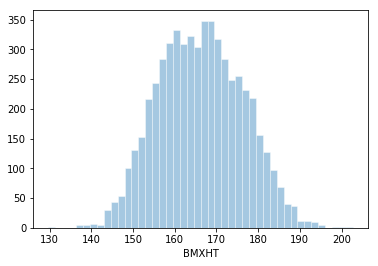

In [9]:
# insert your code here
sns.distplot(da.BMXHT.dropna(),kde=False,hist_kws=dict(edgecolor="w", linewidth=1))

__Q3a.__ Use the `bins` argument to [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) to produce histograms with different numbers of bins.  Assess whether the default value for this argument gives a meaningful result, and comment on what happens as the number of bins grows excessively large or excessively small. 

default value of bins gives a good plot. If we increase the bins too high, the plot looks very noisy and overfit with too many spikes. Reducing the bins increases the smoothness.

__Q3b.__ Make separate histograms for the heights of women and men, then make a side-by-side boxplot showing the heights of women and men.

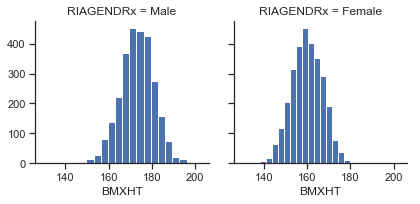

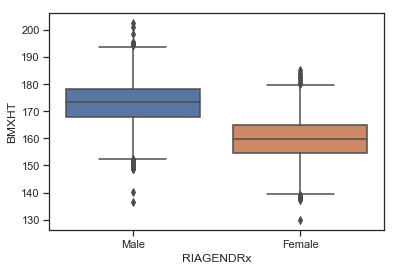

In [10]:
# insert your code here
sns.set(style="ticks", color_codes=True)
g = sns.FacetGrid(da, col='RIAGENDRx', palette="Set1")
g.map(plt.hist,'BMXHT',bins=20)

plt.figure()
sns.boxplot(x="RIAGENDRx", y="BMXHT", data=da)

__Q3c.__ Comment on what features, if any are not represented clearly in the boxplots, and what features, if any, are easier to see in the boxplots than in the histograms.

Distribution of data is easier to see in a histogram. 
Box plots make it easier to see the median, IQR spread of data.

__Q3d.__ Make a histogram of the log-transformed heights.

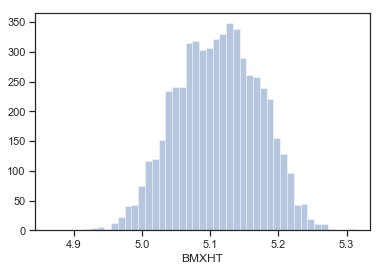

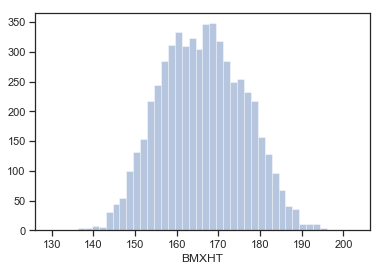

In [11]:
# insert your code here
sns.distplot(np.log(da.BMXHT.dropna()),kde=False,hist_kws=dict(edgecolor="w", linewidth=1))
plt.figure()
sns.distplot(da.BMXHT.dropna(),kde=False,hist_kws=dict(edgecolor="w", linewidth=1))

__Q3e.__ Comment on the relationship between the ditribution of the heights and the distribution of the log-transformed heights. 

Log transformation is useful in dealing with skewed data. The log-transformed distribution appears more close to a normal distribution in the above plots.

## Question 4

Make a boxplot showing the distribution of within-subject differences between the first and second systolic blood pressure measurents ([BPXSY1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY1) and [BPXSY2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY2)).

Text(0.5, 1.0, 'Histogram of within-subject differences between the first and second systolic blood pressure measurents')

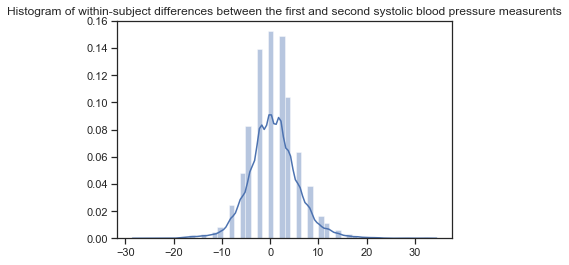

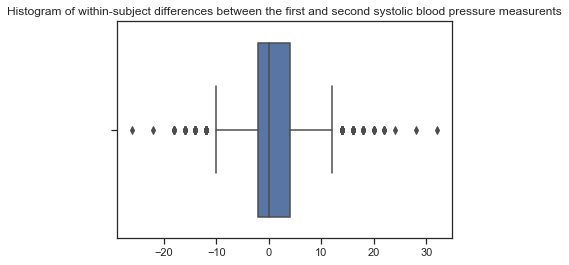

In [12]:
# insert your code here
da_filtered = da[~(pd.isnull(da['BPXSY1']) | pd.isnull(da['BPXSY2']))]
diff = da_filtered.BPXSY1-da_filtered.BPXSY2
sns.distplot(diff).set_title("Histogram of within-subject differences between the first and second systolic blood pressure measurents")

plt.figure()
sns.boxplot(diff).set_title("Histogram of within-subject differences between the first and second systolic blood pressure measurents")


__Q4a.__ What proportion of the subjects have a lower SBP on the second reading compared to the first?

In [18]:
# insert your code here
da_lower = da['BPXSY1'] > da['BPXSY2']
da_lower.sum()/len(da_lower)

0.42946817785527464

__Q4b.__ Make side-by-side boxplots of the two systolic blood pressure variables.

Text(0, 0.5, 'Blood pressure in mm/Hg')

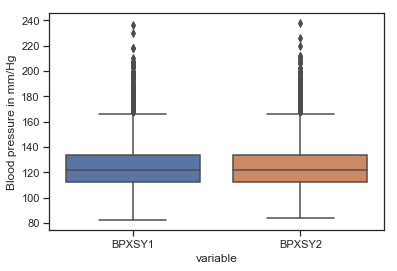

In [23]:
# insert your code here
da_slice = da[['BPXSY1','BPXSY2']]
da_slice = pd.melt(da_slice)
sns.boxplot(x=da_slice['variable'], y=da_slice['value']).set_ylabel("Blood pressure in mm/Hg")

__Q4c.__ Comment on the variation within either the first or second systolic blood pressure measurements, and the variation in the within-subject differences between the first and second systolic blood pressure measurements.

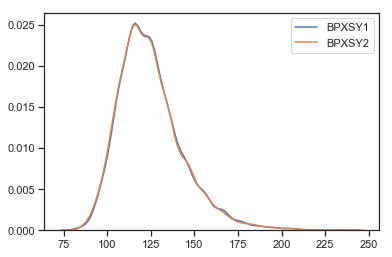

In [28]:
sns.kdeplot(da['BPXSY1'])
sns.kdeplot(da['BPXSY2'])

Both systolic distributions are nearly identical.
The median value of the difference is 0. The spread of difference is higher on the right of median than on left of median.

## Question 5

Construct a frequency table of household sizes for people within each educational attainment category (the relevant variable is [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2)).  Convert the frequencies to proportions.

In [44]:
# insert your code here
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})
da_filtered = da[~pd.isnull(da["DMDEDUC2x"])]
da_filtered = da_filtered.groupby(['DMDEDUC2x']).DMDHHSIZ.value_counts().unstack()
da_filtered_proportions = da_filtered.apply(lambda x:x/x.sum(),axis=1)
print(da_filtered)
print('\n')
print(da_filtered_proportions)

DMDHHSIZ             1      2      3      4      5     6     7
DMDEDUC2x                                                     
9-11              75.0  143.0  105.0   98.0   94.0  73.0  55.0
<9                72.0  147.0   96.0   87.0   97.0  71.0  85.0
College          195.0  475.0  265.0  226.0  130.0  40.0  35.0
Don't know         NaN    2.0    NaN    NaN    1.0   NaN   NaN
HS/GED           181.0  321.0  203.0  192.0  130.0  78.0  81.0
Some college/AA  245.0  436.0  313.0  274.0  198.0  82.0  73.0


DMDHHSIZ                1         2         3         4         5         6  \
DMDEDUC2x                                                                     
9-11             0.116641  0.222395  0.163297  0.152411  0.146190  0.113530   
<9               0.109924  0.224427  0.146565  0.132824  0.148092  0.108397   
College          0.142753  0.347731  0.193997  0.165447  0.095168  0.029283   
Don't know            NaN  0.666667       NaN       NaN  0.333333       NaN   
HS/GED           0.1

__Q5a.__ Comment on any major differences among the distributions.


Familie with 2 kids are most common overall.
People with college and some college tend to have smaller families.

__Q5b.__ Restrict the sample to people between 30 and 40 years of age.  Then calculate the median household size for women and men within each level of educational attainment.

In [83]:
# insert your code here
def print_medians(da):
    da_filtered = da[~pd.isnull(da["DMDEDUC2x"])]
    da_filtered = da_filtered[['DMDEDUC2x','DMDHHSIZ']]
    da_filtered = da_filtered.groupby(['DMDEDUC2x'])#.DMDHHSIZ.value_counts()
    for name, group in da_filtered:
        #print(name+':')
        print(name+':'+str(np.median(group.DMDHHSIZ)))
        print('\n')

print('Women')
print_medians(women_30_40)
print('\nMen')
print_medians(men_30_40)
#men_30_40.DMDEDUC2x.head()

Women
9-11:5.0


<9:5.0


College:3.0


HS/GED:5.0


Some college/AA:4.0



Men
9-11:4.5


<9:5.0


College:3.0


HS/GED:4.0


Some college/AA:4.0




## Question 6

The participants can be clustered into "maked variance units" (MVU) based on every combination of the variables [SDMVSTRA](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVSTRA) and [SDMVPSU](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVPSU).  Calculate the mean age ([RIDAGEYR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDAGEYR)), height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)), and BMI ([BMXBMI](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXBMI)) for each gender ([RIAGENDR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIAGENDR)), within each MVU, and report the ratio between the largest and smallest mean (e.g. for height) across the MVUs.

In [90]:
# insert your code here
def print_ratio(arr):
    print(max(arr)/min(arr))

da_grouped = da.groupby(['SDMVSTRA','SDMVPSU'])
mean_age = list()
mean_height = list()
mean_bmi = list()
for name, group in da_grouped:
    gender_group = group.groupby(['RIAGENDR'])
    print(name)
    for gender_name,g_group in gender_group:
        print(gender_name)
        mean_age.append(np.mean(g_group.RIDAGEYR))
        mean_height.append(np.mean(g_group.BMXHT))
        mean_bmi.append(np.mean(g_group.BMXBMI))
        print('mean RIDAGEYR: '+str(np.mean(g_group.RIDAGEYR)))
        print('mean BMXHT: '+str(np.mean(g_group.BMXHT)))
        print('mean BMXBMI: '+str(np.mean(g_group.BMXBMI)))
print('____________________________________________')
print('Height:')
print_ratio(mean_height)
print('Age:')
print_ratio(mean_age)
print('BMI:')
print_ratio(mean_bmi)

(119, 1)
1
mean RIDAGEYR: 47.861111111111114
mean BMXHT: 172.74166666666667
mean BMXBMI: 26.95833333333333
2
mean RIDAGEYR: 47.66326530612245
mean BMXHT: 159.57040816326537
mean BMXBMI: 30.052040816326528
(119, 2)
1
mean RIDAGEYR: 54.36363636363637
mean BMXHT: 172.90681818181827
mean BMXBMI: 27.160465116279077
2
mean RIDAGEYR: 52.98795180722892
mean BMXHT: 159.24457831325302
mean BMXBMI: 27.84939759036144
(120, 1)
1
mean RIDAGEYR: 43.13
mean BMXHT: 169.53775510204076
mean BMXBMI: 30.939175257731954
2
mean RIDAGEYR: 43.63636363636363
mean BMXHT: 155.40204081632652
mean BMXBMI: 32.41938775510204
(120, 2)
1
mean RIDAGEYR: 45.21917808219178
mean BMXHT: 173.0753424657534
mean BMXBMI: 27.72739726027397
2
mean RIDAGEYR: 43.736111111111114
mean BMXHT: 159.2180555555555
mean BMXBMI: 27.399999999999995
(121, 1)
1
mean RIDAGEYR: 46.75
mean BMXHT: 172.1778846153847
mean BMXBMI: 29.416504854368938
2
mean RIDAGEYR: 44.39795918367347
mean BMXHT: 158.87157894736845
mean BMXBMI: 30.85684210526317
(121,

__Q6a.__ Comment on the extent to which mean age, height, and BMI vary among the MVUs.

__Q6b.__ Calculate the inter-quartile range (IQR) for age, height, and BMI for each gender and each MVU.  Report the ratio between the largest and smalles IQR across the MVUs.

In [ ]:
# insert your code here

__Q6c.__ Comment on the extent to which the IQR for age, height, and BMI vary among the MVUs.